In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf


from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow import keras

tf.__version__

'2.2.0'

In [29]:
from tensorflow.keras.datasets import mnist

In [39]:
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()
print("Training set: ", X_train.shape,"\nTesting Set: ", X_test.shape)

# Making values range from 0 to 1
X_train_og = X_train
X_test_og  = X_test
X_train = X_train / 255.0
X_test = X_test / 255.0

# Every picture has a 3rd dimention of 1 
X_train = X_train.reshape(60000, 28, 28, 1)
X_test = X_test.reshape(10000, 28, 28, 1)

class_names = [i for i in range(10)]

Training set:  (60000, 28, 28) 
Testing Set:  (10000, 28, 28)


In [31]:
new_model = tf.keras.models.load_model('saved_model/my_model')

In [32]:
new_model.evaluate(X_test, Y_test)

313/313 [==============================] - 6s 20ms/step - loss: 0.0302 - accuracy: 0.9913


[0.030185312032699585, 0.9912999868392944]

7


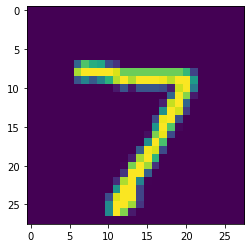

In [33]:
print(np.argmax(new_model.predict(np.expand_dims(X_test[0],0))))
plt.imshow(X_test_og[0])

In [35]:
predictions = new_model.predict(X_test)

In [36]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

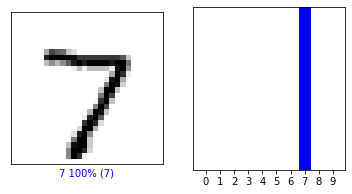

In [40]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], Y_test, X_test_og)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  Y_test)
plt.show()

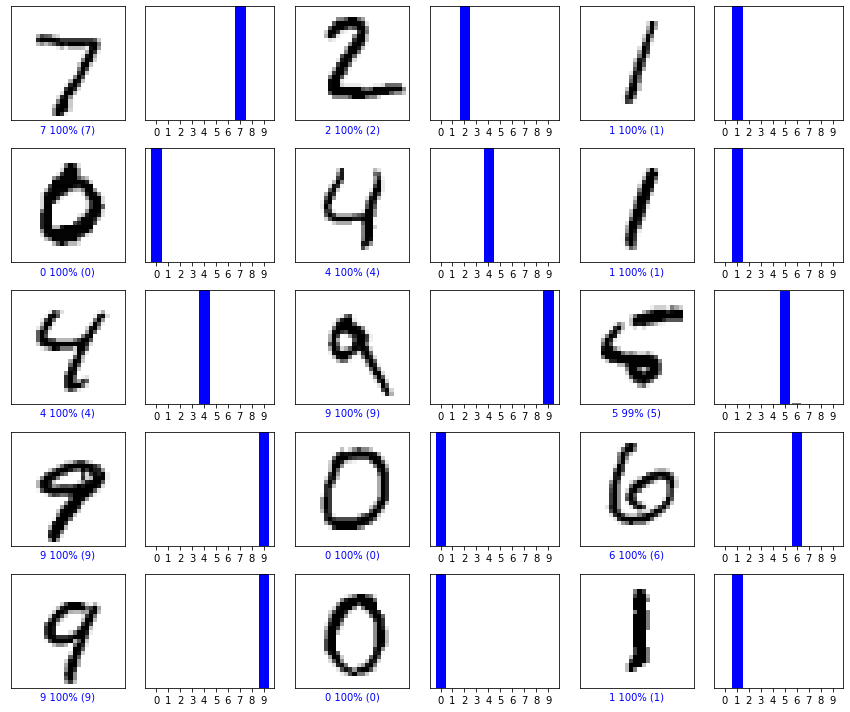

In [43]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], Y_test, X_test_og)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], Y_test)
plt.tight_layout()
plt.show()